# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Содержание таблицы:  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('Ya_data/real_estate_data.csv', sep = '\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

таблица состоит из 23699 строк. В таблице имеются пропуски и несоотвествие типов данных. 

## Предобработка данных

In [5]:
df = df.drop_duplicates(['locality_name', 'rooms', 'floor', 'total_area', 'kitchen_area', 'living_area'])
df.shape

(23207, 22)

### Поиск пропусков и аномальных значений

In [6]:
df.isna().mean().sort_values() # посчитаем и отсортируем пропуски.

total_images            0.000000
open_plan               0.000000
floor                   0.000000
rooms                   0.000000
studio                  0.000000
total_area              0.000000
last_price              0.000000
first_day_exposition    0.000000
locality_name           0.002068
floors_total            0.003577
living_area             0.077692
kitchen_area            0.093851
days_exposition         0.135390
ponds_around3000        0.236696
parks_around3000        0.236696
cityCenters_nearest     0.236739
airports_nearest        0.237687
ceiling_height          0.387038
balcony                 0.485198
ponds_nearest           0.617357
parks_nearest           0.661051
is_apartment            0.883182
dtype: float64

is_apartment не представляет интерес для инашего исследования. Там 88% пропусков. Поэтому удалим его.

In [7]:
df = df.drop('is_apartment',axis = 1) # удаляем столбец

Пропуски количества болконов, парков и водоемов заменим на 0. Если не указано, значит их нет.

In [8]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [9]:
df.describe() # посмотрим на статисчические показатели данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23207.000000,2.320700e+04,23207.000000,23207.000000,14225.000000,23124.000000,21404.000000,23207.000000,21029.000000,23207.000000,17691.000000,17713.000000,23207.000000,7866.000000,23207.000000,8880.000000,20065.000000
mean,9.889861,6.572792e+06,60.625134,2.078295,2.770365,10.703382,34.589374,5.917568,10.615349,0.595596,28800.263976,14229.200869,0.466454,490.227435,0.588788,516.870495,181.093745
std,5.685449,1.098235e+07,35.866929,1.082536,1.242648,6.616429,22.142790,4.905183,5.936872,0.963205,12633.431793,8681.040835,0.747360,341.438869,0.883667,277.127324,219.898144
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.410500e+06,40.000000,1.000000,2.520000,5.000000,18.700000,2.000000,7.000000,0.000000,18615.500000,9184.000000,0.000000,287.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.100000,2.000000,2.650000,9.000000,30.000000,4.000000,9.200000,0.000000,26711.000000,13107.000000,0.000000,453.000000,0.000000,502.000000,96.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.800000,16.000000,42.500000,8.000000,12.000000,1.000000,37243.000000,16333.000000,1.000000,612.000000,1.000000,726.250000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


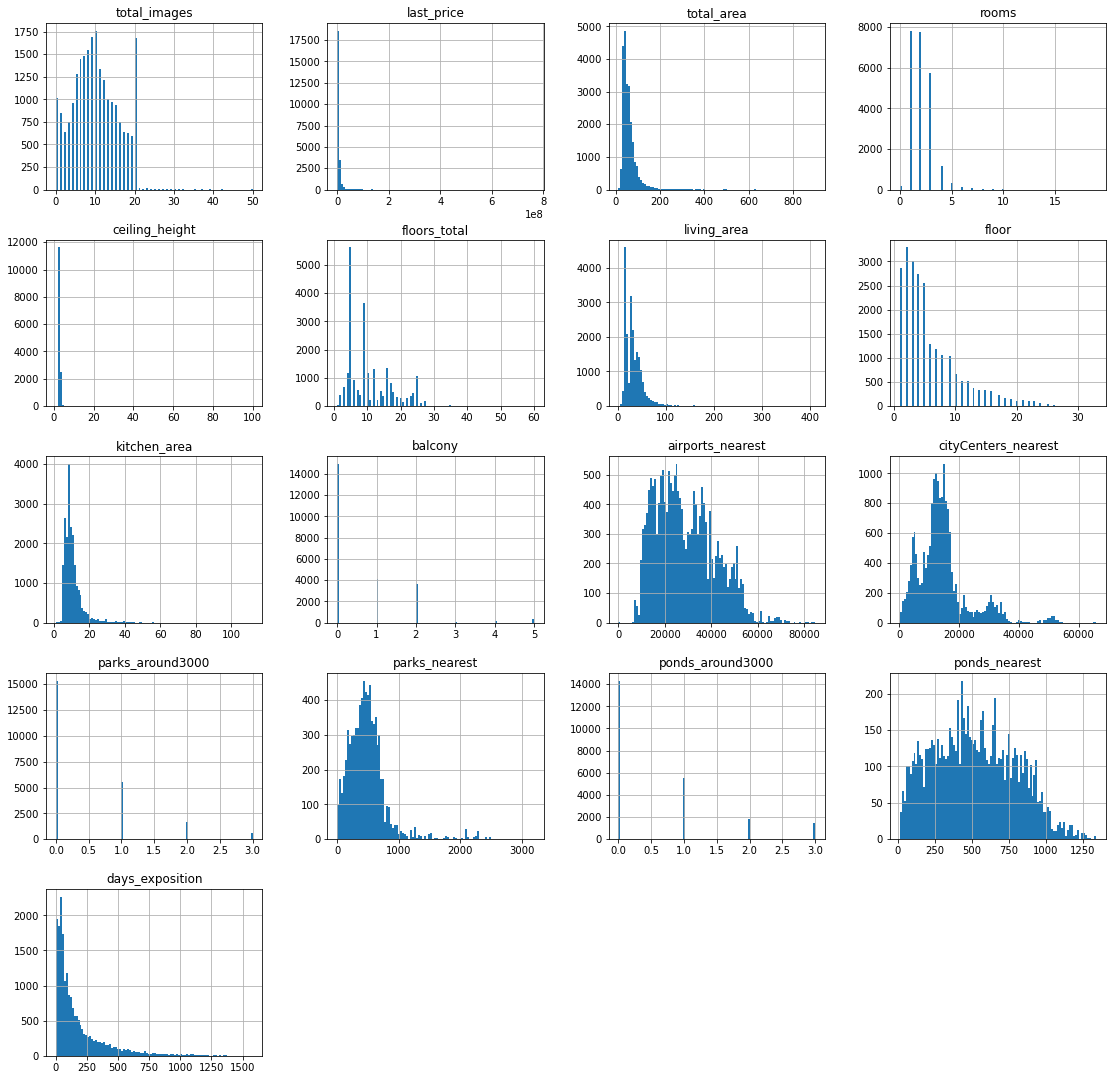

In [10]:
df.hist(bins = 100, figsize=(19,19)) #построим гистограммы распределения
plt.show()

По гистограммам распределения можно выделить аномальною высоту потолков. Рассмотрим эти данные

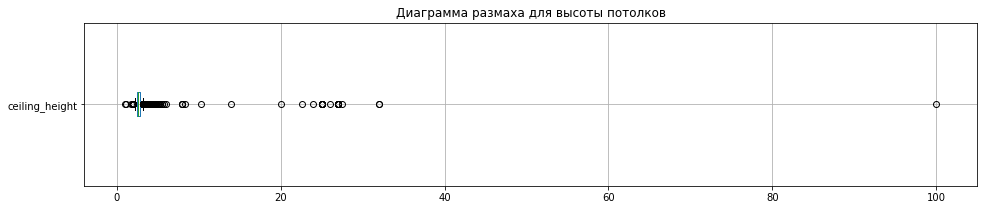

In [11]:
df.boxplot(column=['ceiling_height'], figsize=(16,3), vert=False)
plt.title('Диаграмма размаха для высоты потолков')
plt.show()

In [12]:
df.query('ceiling_height > 8 | ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,False,...,8.00,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.00,25.0,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,False,...,5.50,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.0,3,False,...,9.00,2.0,деревня Мины,NaN,NaN,0.0,NaN,0.0,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9.0,21.3,3,False,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,0.0,городской посёлок Мга,NaN,NaN,0.0,NaN,0.0,NaN,248.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,False,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.30,16.0,19.3,14,False,...,8.30,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.00,5.0,31.3,5,False,...,5.70,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN


По приведенному срезу данных аномальных значений высот (меньше 2 и больше 8 метров) можно заметить что у некоторох чисел пропущена запятая. Исарвим эту ошибку делением на 10

In [13]:
df['ceiling_height'][df['ceiling_height'] >= 20] = df['ceiling_height'][df['ceiling_height'] >= 20] / 10

C:\Users\Lexa\AppData\Local\Temp/ipykernel_11736/4179257648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ceiling_height'][df['ceiling_height'] >= 20] = df['ceiling_height'][df['ceiling_height'] >= 20] / 10


Пропуски высот и другие аномальные значения (больше 6 и меньше 2 метров) заменим медианой

In [14]:
ceiling_height_median = df['ceiling_height'].median()
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] = ceiling_height_median
df.loc[df['ceiling_height'] > 6, 'ceiling_height'] = ceiling_height_median
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)

Результат после исправления

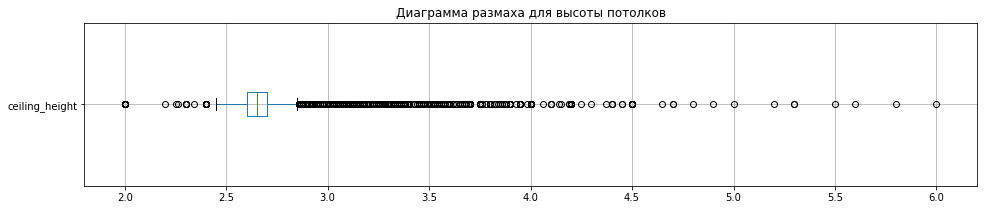

In [15]:
df.boxplot(column=['ceiling_height'],figsize=(16,3), vert = False)
plt.title('Диаграмма размаха для высоты потолков')
plt.show()

В данных о названии населенных пунктов и общем колличестве этажей содержится небольшое колличество пропусков (доли процента). Эти данные можно удалить.

In [16]:
df = df.dropna(subset = ['locality_name','floors_total'])

Остальные пропуски оставим.

In [17]:
df.isna().mean().sort_values()

total_images            0.000000
ponds_around3000        0.000000
parks_around3000        0.000000
locality_name           0.000000
balcony                 0.000000
studio                  0.000000
floor                   0.000000
open_plan               0.000000
floors_total            0.000000
ceiling_height          0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
last_price              0.000000
living_area             0.076570
kitchen_area            0.092040
days_exposition         0.135720
cityCenters_nearest     0.237293
airports_nearest        0.238246
ponds_nearest           0.618321
parks_nearest           0.661178
dtype: float64

### Изменение типов данных

В столбцах floors_total, balcony, parks_around3000, ponds_around3000 заменим тип данных на целочисленный. Потому что дробных значенй там быть не может.

In [18]:
cols_type_chenge = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', ]
for col in cols_type_chenge:
    df[col] = df[col].astype('int64')

Переведем first_day_exposition из строки в дату.

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')


In [20]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23077 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23077 non-null  int64         
 1   last_price            23077 non-null  float64       
 2   total_area            23077 non-null  float64       
 3   first_day_exposition  23077 non-null  datetime64[ns]
 4   rooms                 23077 non-null  int64         
 5   ceiling_height        23077 non-null  float64       
 6   floors_total          23077 non-null  int64         
 7   living_area           21310 non-null  float64       
 8   floor                 23077 non-null  int64         
 9   studio                23077 non-null  bool          
 10  open_plan             23077 non-null  bool          
 11  kitchen_area          20953 non-null  float64       
 12  balcony               23077 non-null  int64         
 13  locality_name   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


### Вывод

Заменили пропуски и аномальные значения там где это возможно. Поменяли тип данных там геде нужно.

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра

In [21]:
df['square_metr_cost'] = df['last_price'] / df['total_area']

 Посчитаем день недели, месяц и год публикации объявления

In [22]:
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_metr_cost,year_exposition,month_exposition,weekday_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,2019,3,Thursday
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,2018,12,Tuesday
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,2015,8,Thursday
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,2015,7,Friday
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,2018,6,Tuesday


Посчитаем тип этажа квартиры

In [23]:
df['floor_type'] = df['floors_total'] - df['floor']
df['floor_type'] = df['floor_type'].where(df['floor_type'] != 0 , 'последний')
df['floor_type'] = df['floor_type'].where(df['floor'] != 1 , 'первый')
df['floor_type'] = df['floor_type'].where((df['floor_type'] == 'последний') | (df['floor_type'] == 'первый'), 'другой')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_metr_cost,year_exposition,month_exposition,weekday_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.370370,2019,3,Thursday,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.792079,2018,12,Tuesday,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,2015,8,Thursday,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,2,84.0,3,234.0,424.0,408176.100629,2015,7,Friday,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,2018,6,Tuesday,другой


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [24]:
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,square_metr_cost,year_exposition,month_exposition,weekday_exposition,floor_type,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,2019,3,Thursday,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,82920.792079,2018,12,Tuesday,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,2015,8,Thursday,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.0,424.0,408176.100629,2015,7,Friday,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,2018,6,Tuesday,другой,0.320000,0.410000


### Вывод

Посчитано и добавлено в таблицу:  
цена квадратного метра  
день недели, месяц и год публикации объявления  
этаж квартиры; варианты — первый, последний, другой  
соотношение жилой и общей площади, а также отношение площади кухни к общей 

## Исследовательский анализ данных

### Площадь квартир

count    23077.000000
mean        60.599387
std         35.868952
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

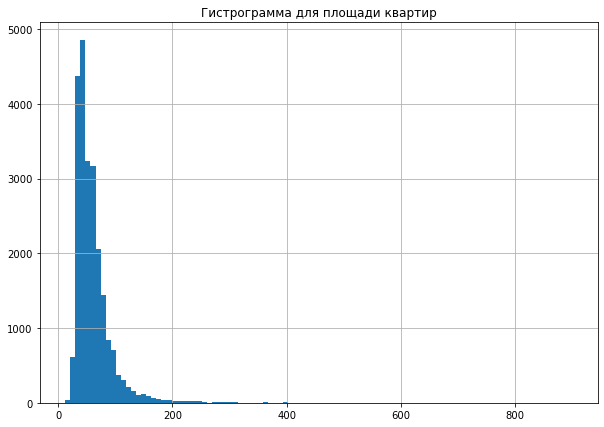

In [25]:
df['total_area'].hist(bins=100, figsize = (10,7))
plt.title('Гистрограмма для площади квартир')
df['total_area'].describe()

### Цена квартир

count    2.307700e+04
mean     6.571595e+06
std      1.100626e+07
min      1.219000e+04
25%      3.405000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

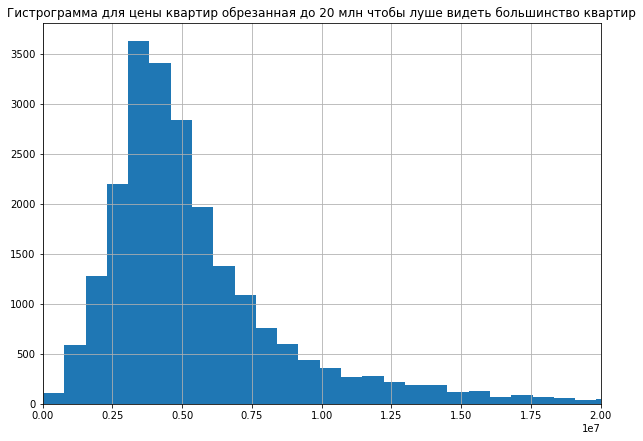

In [26]:
df['last_price'].hist(bins=1000, figsize = (10,7))
plt.xlim(0, 20000000)
plt.title('Гистрограмма для цены квартир обрезанная до 20 млн чтобы луше видеть большинство квартир')
df['last_price'].describe()
#plt.show()

In [27]:
df.query('last_price > 200000000 | last_price < 300000') #посмотрим на очень дорогие и дешовые квартиры

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,square_metr_cost,year_exposition,month_exposition,weekday_exposition,floor_type,living_to_total_area,kitchen_to_total_area
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,3,285.0,233.0,1.736842e+06,2018,4,Wednesday,другой,0.500000,0.210526
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7,NaN,7,False,...,2,198.0,50.0,4.600000e+05,2017,5,Wednesday,последний,NaN,0.080000
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,NaN,8.0,1.118349e+02,2019,3,Wednesday,последний,0.293578,0.371560
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,3,756.0,33.0,1.907500e+06,2017,9,Saturday,последний,0.625000,NaN
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,2,198.0,199.0,5.853659e+05,2017,4,Saturday,последний,0.531707,0.097561
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,1,478.0,393.0,1.000748e+06,2016,2,Saturday,последний,0.508728,0.059850
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,2,198.0,111.0,4.854369e+05,2017,12,Monday,другой,0.417476,0.113269
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,3,140.0,249.0,8.575429e+05,2017,4,Monday,другой,0.639832,0.104305
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2,318.0,106.0,4.666667e+05,2017,12,Wednesday,последний,0.455222,0.124444
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,3,188.0,NaN,1.542605e+06,2019,3,Tuesday,последний,0.339733,0.161067


Гистрограмма по цене похожа на распределение Пуасона. В основном цена 4-6 млн. Есть оцень дорогие элитные квартиры. Есть 1 очень дешевая квартира. Скорей всего там 0 потеряли.

### Число комнат

count    23077.000000
mean         2.078260
std          1.082701
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

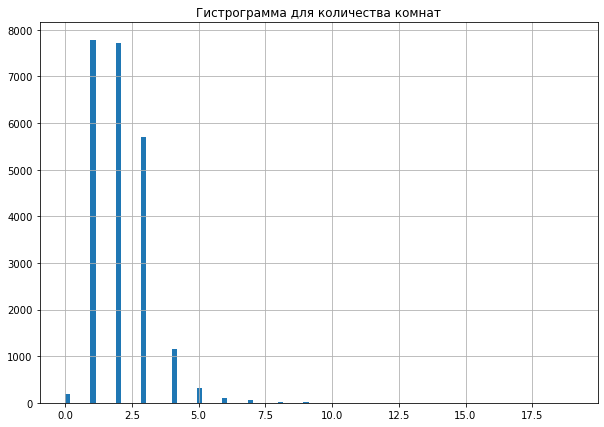

In [28]:
df['rooms'].hist(bins=100, figsize=(10,7))
plt.title('Гистрограмма для количества комнат')
df['rooms'].describe()

In [29]:
df.loc[df['rooms'] < 1]['living_area'].describe()

count    183.000000
mean      18.865246
std        6.549527
min        2.000000
25%       16.000000
50%       18.000000
75%       19.950000
max       68.000000
Name: living_area, dtype: float64

Довольно много квартир с нулевым колличеством комнат. Судя по площади это однокомнатные квартиры или комнаты. Можно зменить 0 на 1.

count    23077.000000
mean         2.086666
std          1.070343
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

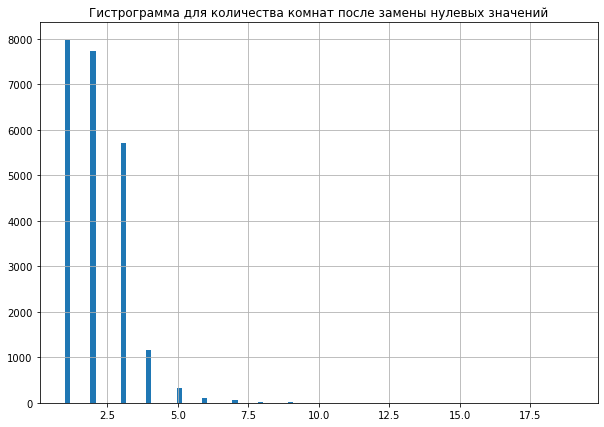

In [30]:
df.loc[df['rooms'] < 1, 'rooms'] = 1
df['rooms'].hist(bins=100, figsize=(10,7))
plt.title('Гистрограмма для количества комнат после замены нулевых значений')
df['rooms'].describe()

### Высота потолков

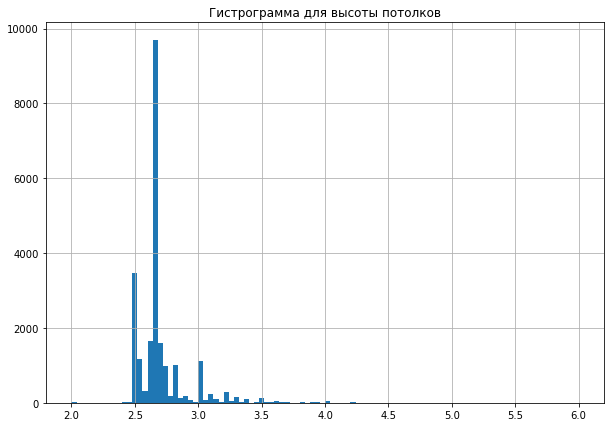

In [31]:
df['ceiling_height'].hist(bins=100, figsize = (10,7))
df['ceiling_height'].describe()
plt.title('Гистрограмма для высоты потолков')
plt.show()

### Время продажи квартиры

count    19945.000000
mean       180.990273
std        219.992922
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

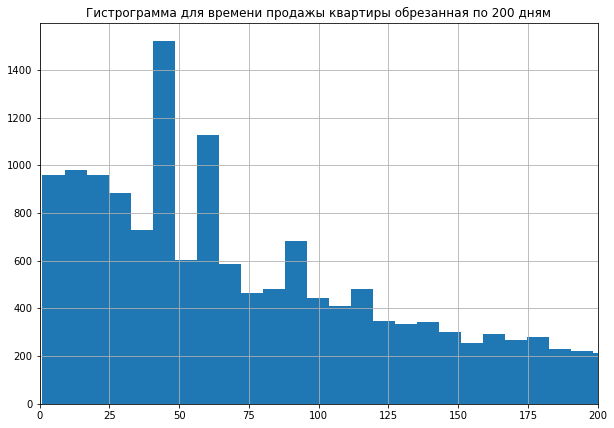

In [32]:
df['days_exposition'].hist(bins=200, figsize = (10,7))
plt.xlim(0, 200)
plt.title('Гистрограмма для времени продажы квартиры обрезанная по 200 дням')
df['days_exposition'].describe()

Среднее 181 день. Медианное 95 дней. Обычно квартира продается за 30 дней. Есть выбросы на 40, на 60, на 90 днях. Возможно это закончился максимальный срок показа обьявления. Быструю продажу можно считать 10 дней. Долгие продажи занимают больше 200 дней.

### Зависимость цены от площади

In [33]:
#функция строит график и считает коэффициэет корреляции для зависимости цены от разных параметров.
def price_dep(param, title):
    df.plot(x=param, y='last_price', kind='scatter', figsize = (10,7))
    plt.title(title)
    print('Коэффициент корреляции:{:.2f}' .format(df[param].corr(df['last_price'])))

Коэффициент корреляции:0.65


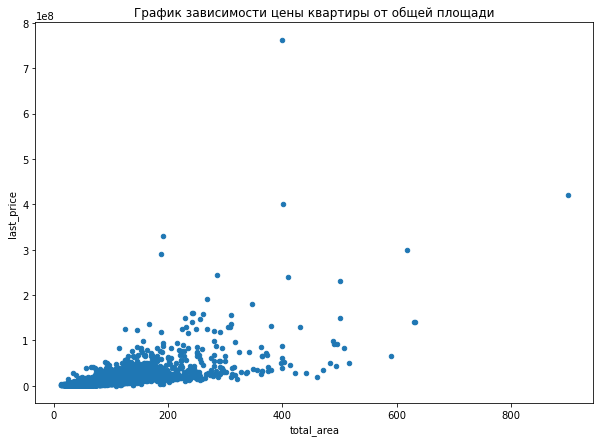

In [34]:
price_dep('total_area', 'График зависимости цены квартиры от общей площади')

Цена сильно зависит от площади для небольших по ценен и площади квартир. Коэффициент корреляции 0,65. Чем больше площадь, тем больше разброс цен.

### Завиcимость цены от числа комнат

Коэффициент корреляции:0.36


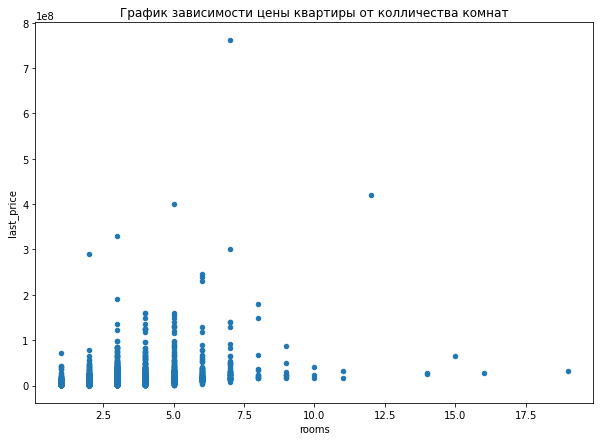

In [35]:
price_dep('rooms', 'График зависимости цены квартиры от колличества комнат')

Цена слобо зависит от количества комнат. Коэффициент корреляции 0,36.

### Завиcимость цены от удалённости от центра

Коэффициент корреляции:-0.21


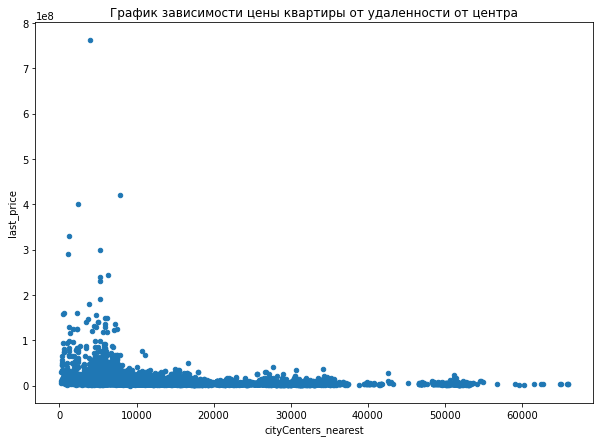

In [36]:
price_dep('cityCenters_nearest', 'График зависимости цены квартиры от удаленности от центра')

Зависимость цены от центра в общем выражена слабо. Коэффициент корреляции -0.21. Высокие цены наблюдаются только в радиусе 10 км от центра.

[]

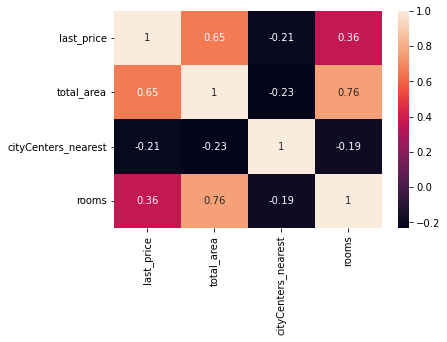

In [37]:
# матрица корреляций
corr_matrix = df[{'total_area', 'last_price','rooms','cityCenters_nearest'}].corr()
sn.heatmap(corr_matrix, annot=True)
plt.plot()

### Завиcимость цены от этажа (первый, последний или другой) и даты размещения: дня недели, месяца и года.

In [38]:
#функция строит столбчатый график для зависимости цены от разных параметров.
def barplot_med(param):
    bar = df.groupby(param[0])['last_price'].median()
    bar.plot(kind='bar', title=param[1], figsize=(10,7))
    plt.show()

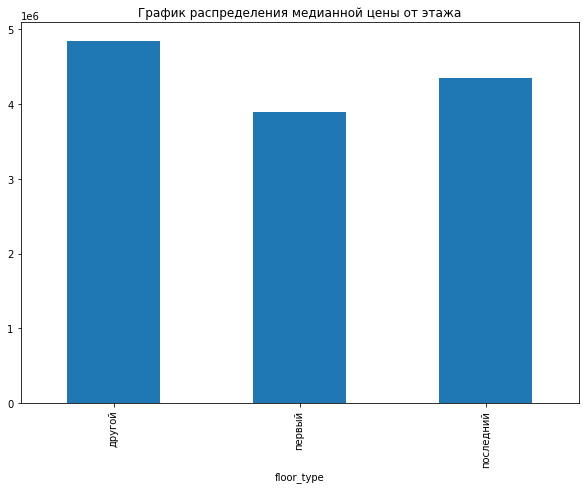

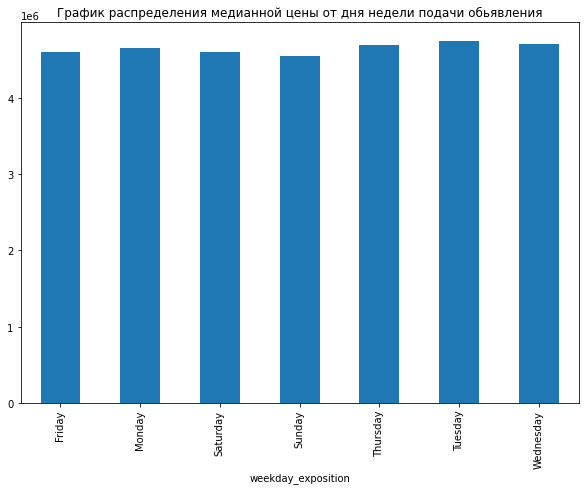

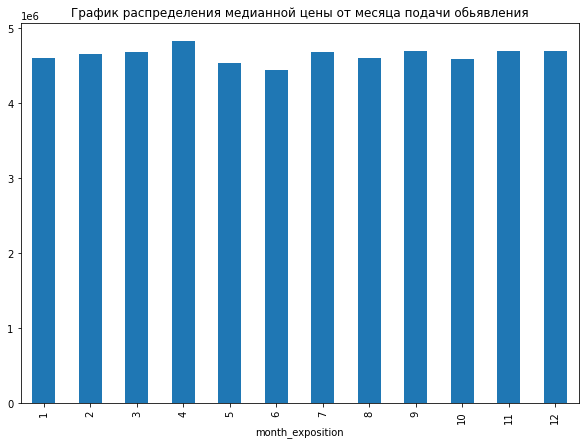

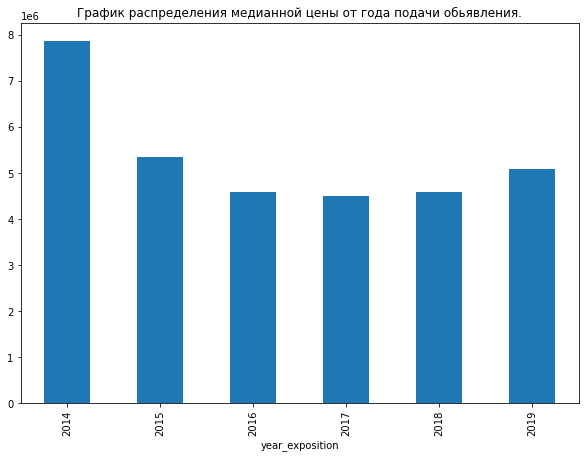

In [39]:
research_param = [['floor_type','График распределения медианной цены от этажа'],
                 ['weekday_exposition','График распределения медианной цены от дня недели подачи обьявления'],
                 ['month_exposition','График распределения медианной цены от месяца подачи обьявления'],
                 ['year_exposition', 'График распределения медианной цены от года подачи обьявления.']]

for param in research_param:
    barplot_med(param)

### 10 населённых пунктов с наибольшим числом объявлений.

In [40]:
#создадим список
top10filter_list = df['locality_name'].value_counts().sort_values(ascending = False).head(10).index
#отфильтруем данные по списку и посчитаем среднее по группам
df[df['locality_name'].isin(top10filter_list)].groupby('locality_name')['last_price'].mean().sort_values(ascending = False)

locality_name
Санкт-Петербург      8.149898e+06
Пушкин               6.492006e+06
посёлок Парголово    4.489940e+06
деревня Кудрово      4.240808e+06
посёлок Шушары       4.109968e+06
Колпино              3.974112e+06
Всеволожск           3.788914e+06
посёлок Мурино       3.667079e+06
Гатчина              3.490555e+06
Выборг               3.265875e+06
Name: last_price, dtype: float64

### Завиcимость цены от удаленности от центра в Санкт-Петербурге

<AxesSubplot:xlabel='cityCenters_nearest_km'>

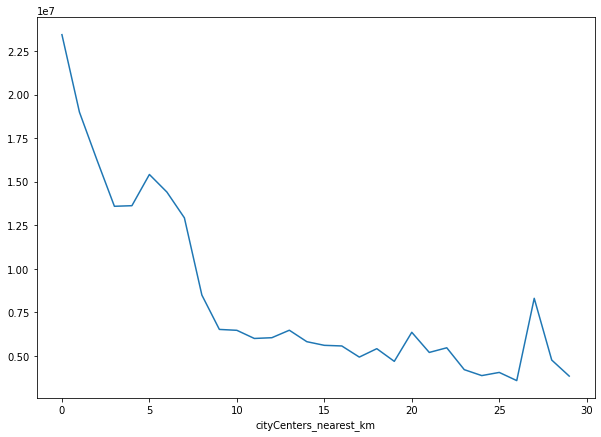

In [41]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median()) #заполним пропуски медианой
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).astype('int')#Создадим новый столбец с километрами
df[df['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km')['last_price'].mean().plot(figsize=(10,7))#Cтроим график средних цен в Питере

При удаленности от центра 7 км цена резко падает. В 3 раза.

### Анализ квартир в центре Санкт-Петербурга

In [42]:
#функция возвращает столбец заданных данных из центра Питера
def centre_data(param):
    return df.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km < 7')[param] 

count    3241.000000
mean       94.557442
std        60.441973
min        12.000000
25%        58.000000
50%        80.000000
75%       111.000000
max       631.200000
Name: total_area, dtype: float64

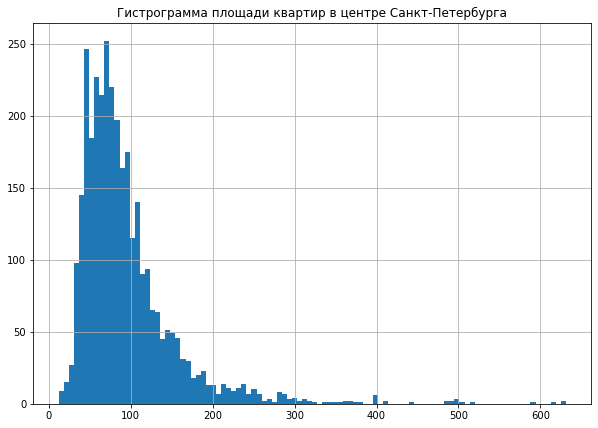

In [43]:
centre_data('total_area').hist(bins=100, figsize=(10,7))
plt.title('Гистрограмма площади квартир в центре Санкт-Петербурга')
centre_data('total_area').describe()

Большинство квартир в центре имеют площадь 80 крадратов.

count    3.241000e+03
mean     1.503808e+07
std      2.486902e+07
min      1.600000e+06
25%      6.750000e+06
50%      9.300000e+06
75%      1.450000e+07
max      7.630000e+08
Name: last_price, dtype: float64

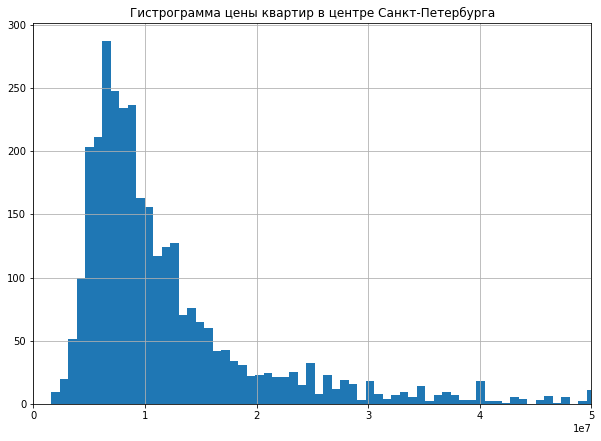

In [44]:
centre_data('last_price').hist(bins=1000, figsize=(10,7))
plt.xlim(0, 50000000)
plt.title('Гистрограмма цены квартир в центре Санкт-Петербурга')
centre_data('last_price').describe()

Большинство квартир в центре имеют стоимость 6 млн.

count    3241.000000
mean        2.877198
std         1.467038
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

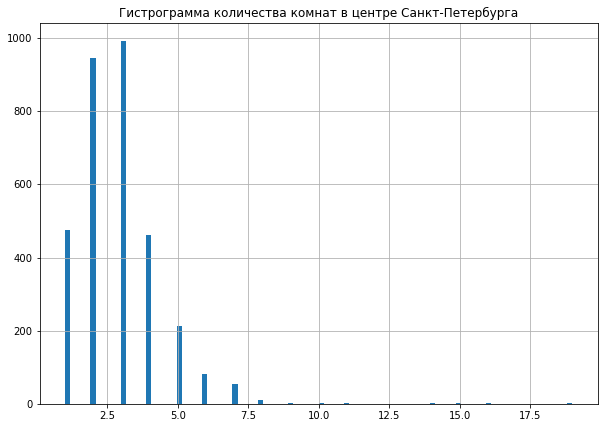

In [45]:
centre_data('rooms').hist(bins=100, figsize=(10,7))
plt.title('Гистрограмма количества комнат в центре Санкт-Петербурга')
centre_data('rooms').describe()

Большинство квартир в центре имеют 2, 3 комнаты

count    3241.000000
mean        2.953061
std         0.379504
min         2.400000
25%         2.650000
50%         2.840000
75%         3.170000
max         6.000000
Name: ceiling_height, dtype: float64

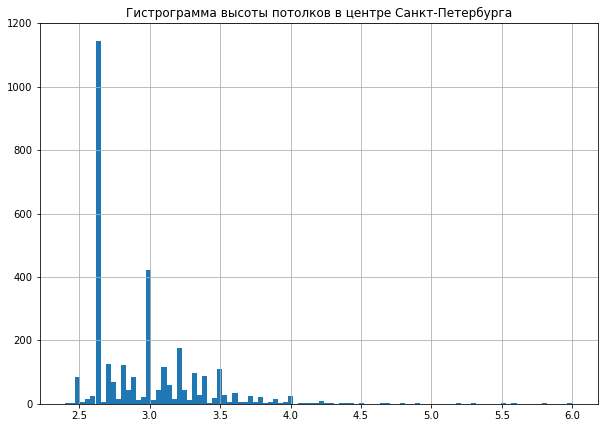

In [46]:
centre_data('ceiling_height').hist(bins=100, figsize=(10,7))
plt.title('Гистрограмма высоты потолков в центре Санкт-Петербурга')
centre_data('ceiling_height').describe()

Большинство квартир в центре имеют стандартные потолки 2.7, 3 метра

### Анализ зависимости стоимости квартир в центре Санкт-Петербурга

In [47]:
#Функция строит график и считает коэффициент корреляции между стоимостью и выбранным параметром
def price_centre_dep(param, title):
    dataSPcentre = df.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km < 7')
    dataSPcentre.plot(x=param, y='last_price', kind='scatter', figsize=(10,7))
    plt.title(title)
    print('Коэффициент корреляции:{:.2f}' .format(dataSPcentre[param].corr(dataSPcentre['last_price'])))

Коэффициент корреляции:0.31


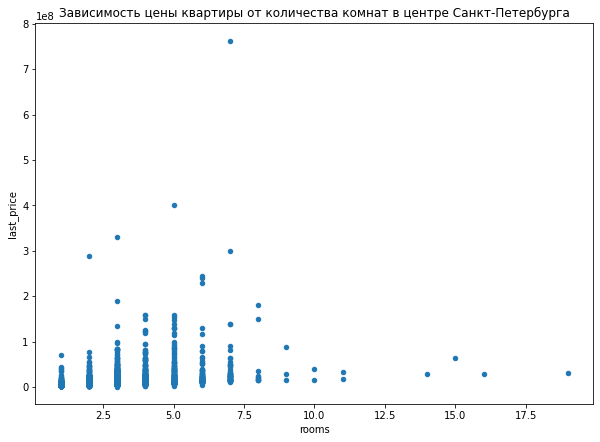

In [48]:
price_centre_dep('rooms', 'Зависимость цены квартиры от количества комнат в центре Санкт-Петербурга')

Цена слабо зависит от количества комнат. Коэффициент корреляции 0,31. Аналогичная ситуация для всего города

Коэффициент корреляции:0.12


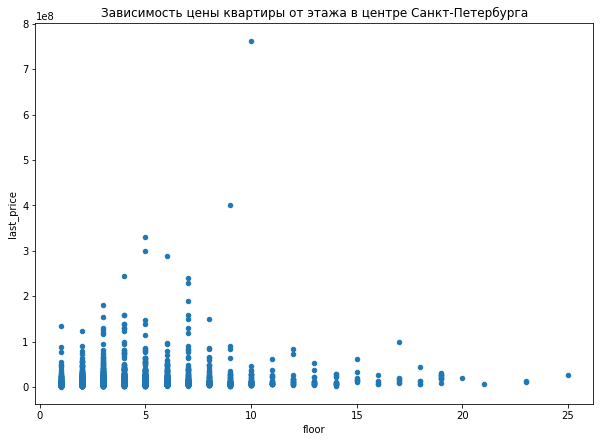

In [49]:
price_centre_dep('floor', 'Зависимость цены квартиры от этажа в центре Санкт-Петербурга')

Цена практически не зависит от этажа. Коэффициент корреляции 0,12.

Коэффициент корреляции:-0.04


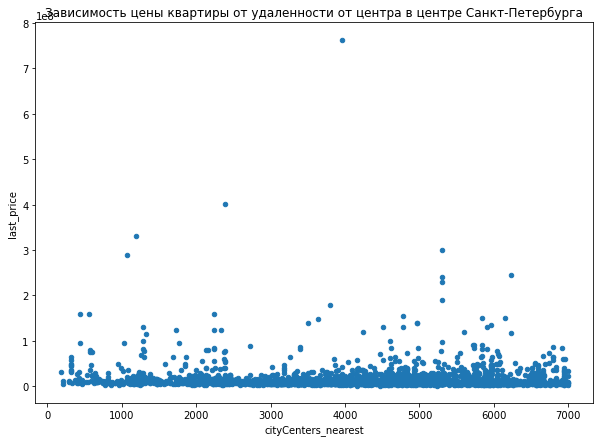

In [50]:
price_centre_dep('cityCenters_nearest', 'Зависимость цены квартиры от удаленности от центра в центре Санкт-Петербурга')

В пределах центра удаленность от центра на цену не влияет. Если рассмаиривать весь город этот параметр влияет на цену.

Коэффициент корреляции:-0.04


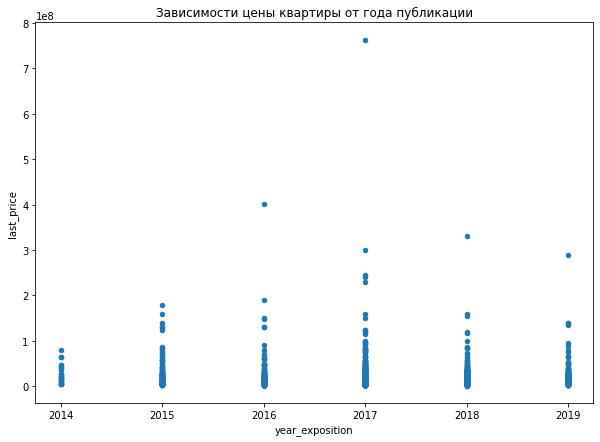

In [51]:
price_centre_dep('year_exposition', 'Зависимости цены квартиры от года публикации')

В пределах центра цена квартир со временем не меняется. По графику можно видеть увеличение колличества дорогих квартир, но на общую статистику они не влияют. Для всего города мы наблюдали сильное падение цен после 14 года.

## Общий вывод

Среднестатистические квартиры имеют:  
- площадь 50-60 квадратов,  
- стоимость 4-6 млн,  
- высоту потолков 2.7 м,  
- число комнат 2, 3. 

Среднее время продажи 30 дней.  
С ростом площади растет и цена. Что очевидно.  
В центре города цена в 3 раза выше. Внутри центра стоимость примерно одинаковая.  
Первый и последний этажи дешевле на 20% и 10% соответсвенно.  
После 14 года цены сильно упали. В центре такого эффекта не наблюдается.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод